In [1]:
# Importing libraries
import random
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import linregress, ks_2samp

# Chapter 16: Random Graphs

## Exercise 16.1:

Consider the network in http://www.networkatlas.eu/exercises/16/1/data.txt. Generate an Erdős–Rényi graph with the samenumber of nodes and edges. Plot both networks' degree CCDFs, in log-log scale. Discuss the salient differences between these distributions.

In [2]:
# Load the edgelist into a graph
G = nx.read_edgelist("ex_16.1.txt")
print(G)

Graph with 2426 nodes and 16631 edges


[Networkx `gnm_random_graph` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html)

<details>
<summary> Hint</summary>

```python
G_rnd = nx.gnm_random_graph(len(G.nodes), len(G.edges))
print(G_rnd)

In [16]:
# Make a random graph version of G with the same number of nodes and edges (a G_n,m random graph)
random_G = nx.gnm_random_graph(len(G.nodes), len(G.edges))
print(random_G)

Graph with 2426 nodes and 16631 edges


In [17]:
# Now we define a function that returns the CCDF of the degree of a graph
# This is identical to code used in the exercises last week,
# so no need to do this again youself
def generate_ccdf(G):
   dd = Counter(dict(G.degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   return ccdf

<details>
<summary> Hint</summary>

```python
G_ccdf = generate_ccdf(G)
print(G_ccdf)
G_rnd_ccdf = generate_ccdf(G_rnd)
G_rnd_ccdf["rnd ccdf"] = G_rnd_ccdf["ccdf"]
print(G_rnd_ccdf)

In [21]:
# Compute the CCDF using this function. Rename the random one for better labeling in the figure.
initial_ccdf = generate_ccdf(G)
random_ccdf = generate_ccdf(random_G)
random_ccdf.columns = ['k', 'rnd_ccdf']
# Print the resulting dataframes to see the structure is the same as last week
initial_ccdf

,k,ccdf
28,1,1.000000
38,2,0.874691
59,3,0.779885
5,4,0.705276
13,5,0.624485
...,...,...
74,151,0.002061
73,154,0.001649
29,173,0.001237
87,223,0.000824


[pandas `.plot` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

<details>
<summary> Hint</summary>

```python
ax = plt.gca()
G_ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "crimson", loglog = True, ax = ax)
G_rnd_ccdf.plot(kind = "line", x = "k", y = "rnd ccdf", color = "cornflowerblue", loglog = True, ax=ax)
plt.show()

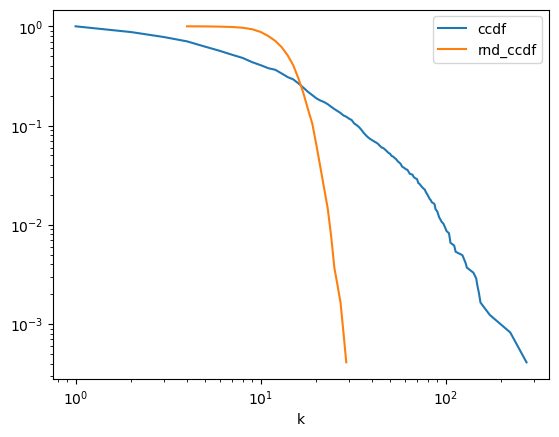

In [19]:
# Plot the distributions using the pandas plotting tool.
# Remember to do this in log-log scale and on the same axis
ax = plt.gca()

initial_ccdf.plot(kind='line', x='k', y='ccdf', loglog=True, ax = ax)
random_ccdf.plot(kind='line', x='k', y='rnd_ccdf', loglog=True, ax = ax)

plt.show()

Explain why the two distributions are different.

When edges and nodes are distribuited at random, the chance of having outliers is super low, therefore the node degrees are more evenly distribuited and the network is less...sparse? The degree distribution standard deviation is lower, but the mean is higher.

## Exercise 16.4:

Generate an Erdős–Rényi graph with the same number of nodes and edges as the network used for question 1. Calculate and compare the networks' clustering coefficients. Compare this with the connection probability p of the random graph (which you should derive from the number of edges and number of nodes using the formula shown in chapter 16).

<details>
<summary> Hint</summary>

```python
print(G)

In [22]:
# Check that the graph variable from before still works
print(G)

Graph with 2426 nodes and 16631 edges


<details>
<summary> Hint</summary>

```python
print(G_rnd)

In [23]:
# Reuse G_rnd from before and check the size is correct, or generate a new one. Use the G_n,m type.
print(random_G)

Graph with 2426 nodes and 16631 edges


[NetworkX `transitivity` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html)

<details>
<summary> Hint</summary>

```python
G_cc = nx.transitivity(G)
G_rnd_cc = nx.transitivity(G_rnd)

print(G_cc)
print(G_rnd_cc)

In [24]:
#Calculate the clustering coefficient of each network
G_cc = nx.transitivity(G)
random_G_cc = nx.transitivity(random_G)

print(f'Initial: {G_cc}, Random: {random_G_cc}')

Initial: 0.23143166252210473, Random: 0.005649023162311754


<details>
<summary> Hint</summary>

```python
all_possible_edges = len(G.nodes) * (len(G.nodes) - 1) / 2 # we subtract one due to no self-loops
p = len(G.edges) / all_possible_edges

print(p)

In [30]:
# Derive the p parameter from the number of nodes and edges of the random graph
# using the formula in the book
rndG_n, rndG_m = (len(random_G.nodes), len(random_G.edges))

p = 2 * rndG_m / (rndG_n * (rndG_n - 1)) 
p # the same as CC, as expected

0.005653870016403056

# Chapter 17: Understanding Network Properties

## Exercise 17.1:

Generate a connected caveman graph with 10 cliques, each with 10 nodes. Generate a small world graph with 100 nodes, each connected to 8 of their neighbors. Add shortcuts for each edge with probability of .05. The two graphs have approximately the same number of edges. Compare their clustering coefficients and their average path lengths.

[NetworkX `connected_caveman_graph` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.connected_caveman_graph.html)

<details>
<summary> Hint</summary>

```python
G_cm = nx.connected_caveman_graph(10, 10)
print(G_cm)

In [31]:
# Generate a caveman graph with 10 cliques of 10 nodes.
caveman_G = nx.connected_caveman_graph(10, 10)
print(caveman_G) # expected 100 nodes

Graph with 100 nodes and 450 edges


[NetworkX `newman_watts_strogatz_graph` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.newman_watts_strogatz_graph.html)

<details>
<summary> Hint</summary>

```python
G_sw = nx.newman_watts_strogatz_graph(100, 8, p = .05)
print(G_sw)

In [32]:
# Generate a smallworld graph with 100 nodes, each connected to 8 of their neighbors
# and add shortcuts for each edge with probability 0.05.
smallworld_G = nx.newman_watts_strogatz_graph(100, 8, 0.05)
print(smallworld_G)

Graph with 100 nodes and 417 edges


[NetworkX `average_shortest_path_length` documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html)

<details>
<summary> Hint</summary>

```python
G_cm_cc = nx.transitivity(G_cm)
G_sw_cc = nx.transitivity(G_sw)
G_cm_apl = nx.average_shortest_path_length(G_cm)
G_sw_apl = nx.average_shortest_path_length(G_sw)

In [34]:
# For each graph, calculate the clustering coefficient and the average shortest path length.
caveman_CC = nx.transitivity(caveman_G)
smallworld_CC = nx.transitivity(smallworld_G)
caveman_SP = nx.average_shortest_path_length(caveman_G)
smallworld_SP = nx.average_shortest_path_length(smallworld_G)

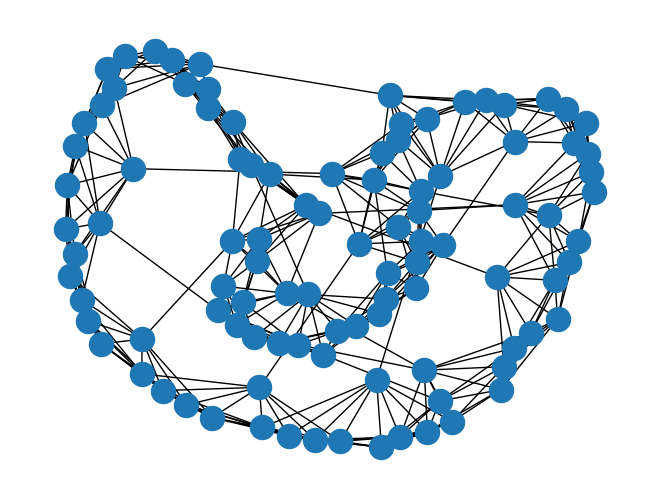

In [37]:
nx.draw(smallworld_G)

<details>
<summary> Hint</summary>

```python
print("Clustering coefficient (SW vs Caveman): %1.4f - %1.4f" % (G_sw_cc, G_cm_cc))
print("APL (SW vs Caveman): %1.4f - %1.4f" % (G_sw_apl, G_cm_apl))

In [35]:
#print the results and compare the two graph types
print(f'Global CC for Caveman: {caveman_CC}, SmallWorld: {smallworld_CC}')
print(f'Average SP for Caveman: {caveman_SP}, SmallWorld: {smallworld_SP}')

Global CC for Caveman: 0.9307479224376731, SmallWorld: 0.5853658536585366
Average SP for Caveman: 5.9363636363636365, SmallWorld: 3.362020202020202


## Exercise 17.2

Generate a preferential attachment network with 2,000 nodes and average degree of 2. Estimate its degree distribution exponent (you can use either the powerlaw package, or do a simple log-log regression of the CCDF).

 [NetworkX `barabasi_albert_graph` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html)

<details>
<summary> Hint</summary>

```python
G = nx.barabasi_albert_graph(2000, 2)

In [38]:
# Generate the graph
pref_G = nx.barabasi_albert_graph(2000, 2)


<details>
<summary> Hint</summary>

```python
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

In [39]:
# Reuse the code from previous exercises to create its CCDF (generate_ccdf(G))
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

<details>
<summary> Hint</summary>

```python
plt.figure(figsize=(6,4))
plt.loglog(ccdf["k"], ccdf["ccdf"], marker="o", linestyle="none", alpha=0.7)
plt.xlabel("Degree k")
plt.ylabel("CCDF: P(K >= k)")
plt.title("Degree CCDF")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

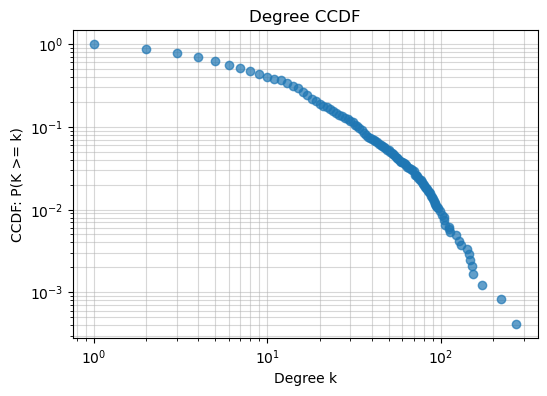

In [43]:
# Plot CCDF
plt.figure(figsize=(6,4))
plt.loglog(ccdf["k"], ccdf["ccdf"], marker='o', linestyle="none", alpha=0.7)
plt.xlabel("Degree k")
plt.ylabel("CCDF: P(K >= k)")
plt.title("Degree CCDF")
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

 [SciPy `linregress` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) 

<details>
<summary> Hint</summary>

```python
logcdf = np.log10(ccdf[["k", "ccdf"]])
slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))

In [46]:
# Do a simple linear regression (we simply want the exponent, not to test whether the power law exists)
logcdf = np.log10(ccdf[['k', 'ccdf']])

slope, log10intercept, r_value, p_value, std_err = linregress(logcdf['k'], logcdf['ccdf'])

print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))

CCDF Fit: 12.7873 x ^ -1.5124 (R2 = 0.8708, p = 0.0000)


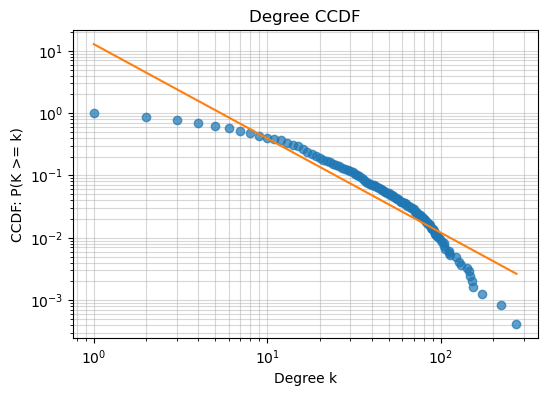

In [48]:
plt.figure(figsize=(6,4))
plt.loglog(ccdf["k"], ccdf["ccdf"], marker='o', linestyle="none", alpha=0.7)
plt.plot(ccdf['k'], 10**log10intercept * (ccdf['k'] ** slope))
plt.xlabel("Degree k")
plt.ylabel("CCDF: P(K >= k)")
plt.title("Degree CCDF")
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

# Chapter 18: Generating realistic data

## Excercise 18.1

Generate a configuration model with the same degree distribution as this network. Perform the Kolmogorov-Smirnov test between the two degree distributions.

In [2]:
# Load data
G = nx.read_edgelist("ex_18.1.txt")

 [NetworkX `degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html) 


<details>
<summary> Hint</summary>

```python
degdistr = sorted(dict(G.degree).values(), reverse = True)

In [3]:
#Get the degree distribution
degree_dist = sorted(dict(G.degree).values(), reverse = True)
degree_dist

[272,
 222,
 169,
 154,
 148,
 147,
 142,
 137,
 126,
 124,
 119,
 119,
 113,
 108,
 105,
 101,
 98,
 98,
 98,
 98,
 97,
 97,
 94,
 90,
 90,
 90,
 90,
 89,
 88,
 87,
 86,
 85,
 84,
 84,
 83,
 82,
 79,
 78,
 78,
 78,
 77,
 77,
 76,
 76,
 74,
 74,
 74,
 73,
 73,
 72,
 72,
 72,
 72,
 72,
 72,
 71,
 69,
 69,
 68,
 68,
 68,
 67,
 67,
 66,
 65,
 65,
 65,
 64,
 63,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 60,
 59,
 59,
 57,
 57,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 54,
 53,
 53,
 53,
 53,
 52,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,

 [NetworkX `configuration_model` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html) 


<details>
<summary> Hint</summary>

```python
G_cm = nx.configuration_model(degdistr)

In [4]:
# Generate configuration model
G_cm = nx.configuration_model(degree_dist)
print(G_cm)

MultiGraph with 1858 nodes and 12534 edges


<details>
<summary> Hint</summary>

```python
degdistr_cm = sorted(dict(G_cm.degree).values(), reverse = True)

In [5]:
# Get the degree distribution of the CM
cm_degdistr = sorted(dict(G_cm.degree).values(), reverse = True)

 [SciPy `ks_2samp` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) 


<details>
<summary> Hint</summary>

```python
ks_2samp(degdistr, degdistr_cm)

In [6]:
# Perform the KS test. The two distributions are exactly the same!
ks_2samp(degree_dist, cm_degdistr)

KstestResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), statistic_location=np.int64(1), statistic_sign=np.int8(1))

## Exercise 18.2

Remove the self-loops and parallel edges from the synthetic network you generated in Exercise 18.1. Note the % of edges you lost. Re-perform the Kolmogorov-Smirnov test with the original network's degree distribution.

 [NetworkX `Graph` documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph) 

 [NetworkX `selfloop_edges` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html) 

 [NetworkX `remove_edges_from` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html) 


<details>
<summary> Hint</summary>

```python
# Remove parallel edges
G_cm2 = nx.Graph(G_cm)

# Remove self loops
G_cm2.remove_edges_from(nx.selfloop_edges(G_cm2))

In [8]:
# Use the same cm graph as in Exercise 18.1
# Remove parallel edges
clean_configG = nx.Graph(G_cm)
# Remove self loops
clean_configG.remove_edges_from(nx.selfloop_edges(clean_configG))

<details>
<summary> Hint</summary>

```python
print("CM2 has %1.2f%% of edges as original CM" % (100 * len(G_cm2.edges) / len(G_cm.edges)))

In [23]:
# Calculate how many edges we lost
print(f'We lost {100 * (1 - (len(clean_configG.edges) / len(G_cm.edges))):.2f} % of the edges.')

We lost 3.57 % of the edges.


<details>
<summary> Hint</summary>

```python
# Get the degree distribution of the CM
degdistr_cm2 = sorted(dict(G_cm2.degree).values(), reverse = True)

# Perform the KS test
ks_2samp(degdistr, degdistr_cm2)

In [26]:
# Get the degree distribution of the CM
filtered_degdistr = sorted(dict(clean_configG.degree).values(), reverse = True)
# Perform the KS test
ks_2samp(cm_degdistr, filtered_degdistr) # so almost the same, therefore degree distribution isn't affected by self loops and parallel edges.

KstestResult(statistic=np.float64(0.006996770721205597), pvalue=np.float64(0.9999999999817853), statistic_location=np.int64(71), statistic_sign=np.int8(-1))

## Exercise 18.3:

Generate an LFR benchmark with 100,000 nodes, a degree exponent alpha = 3.13, a community exponent of 1.1, a mixing parameter mu = 0.1, average degree of 10, and maximum degree of 10000. (Note: there's a networkx function to do this). 

Can you recover the alpha value by fitting the degree distribution?

[NetworkX `LFR_benchmark_graph` documentation](https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.LFR_benchmark_graph.html)   

<details>
<summary> Hint</summary> 

```python
# Use the LFR generator with the given parameters
G = nx.LFR_benchmark_graph(100000, 3.13, 1.1, 0.1, average_degree=10, max_degree=10000)
print(G)

In [28]:
# Use the LFR generator with the given parameters
G = nx.LFR_benchmark_graph(100000, 3.13, 1.1, 0.1, average_degree=10, max_degree=10000)
print(G)

Graph with 100000 nodes and 554930 edges


 [(Wiki) Complementary cumulative distribution function (CCDF)](https://en.wikipedia.org/wiki/Complementary_cumulative_distribution_function)   

<details>
<summary> Hint</summary> 

```python
# Compute the degree distribution and turn it into a CCDF
# Reuse the code for creating the CCDF from previous exercises
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns=("k", "count")).sort_values(by="k")
ccdf = dd.sort_values(by="k", ascending=False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by="k")

In [29]:
# Compute the degree distribution and turn it into a CCDF
# Reuse the code for creating the CCDF from previous exercises
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns=("k", "count")).sort_values(by="k")
ccdf = dd.sort_values(by="k", ascending=False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by="k")

[NumPy `log10` documentation](https://numpy.org/doc/stable/reference/generated/numpy.log10.html)

[SciPy `linregress` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)   

<details>
<summary> Hint</summary> 

```python
# Perform linear regression in log-log scale
# (we simply want the exponent, not to test whether the power law exists)
logcdf = np.log10(ccdf[["k", "ccdf"]])
slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])


In [30]:
# Perform linear regression in log-log scale
# (we simply want the exponent, not to test whether the power law exists)
logcdf = np.log10(ccdf[['k', 'ccdf']])
slope, log10intercept, r_value, p_value, std_error = linregress(logcdf["k"], logcdf["ccdf"])

<details>
<summary> Hint</summary> 

```python
# Report slope and interpret
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" 
      % (10 ** log10intercept, slope, r_value ** 2, p_value))

In [33]:
# Report slope and interpret
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))
print(f'Due to CCDF growing as k^-(alpha - 1), alpha = 1 - s which in our case is {1 - slope:.3f}, initial alpha was 3.13.')

CCDF Fit: 37.6459 x ^ -2.1813 (R2 = 0.9910, p = 0.0000)
Due to CCDF growing as k^-(alpha - 1), alpha = 1 - s which in our case is 3.181, initial alpha was 3.13.


# Chapter 19: Evaluating Statistical Significance

# Exercise 19.1:

Perform 1,000 edge swaps, creating a null version of this network. Make sure you don't create parallel edges. Calculate the Kolmogorov-Smirnov distance between the two degree distributions. Can you tell the difference?

[NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html)   

<details>
<summary> Hint</summary> 

```python
# Load data
G = nx.read_edgelist("ex_19.1.txt")
print(G)


In [34]:
# Load data
G = nx.read_edgelist("ex_19.1.txt")
print(G)

Graph with 1870 nodes and 2277 edges


[Python `random.sample` documentation](https://docs.python.org/3/library/random.html#random.sample)   

<details>
<summary> Hint</summary> 

```python
# Create an edgeset
edgeset = set(G.edges)

for _ in range(1000):
   es = None
   # Reject swaps if they would recreate existing edges
   while es is None or (es[0][0], es[1][0]) in edgeset or (es[0][1], es[1][1]) in edgeset:
      # Convert to list since random.sample requires a sequence
      es = random.sample(list(edgeset), 2)

   # Remove the old edges
   edgeset -= set(es)

   # Add the swapped edges
   edgeset.add((es[0][0], es[1][0]))
   edgeset.add((es[0][1], es[1][1]))


In [36]:
# Create an edgeset
edgeset = set(G.edges)

for _ in range(1000):
   es = None
   # Reject swaps if they would recreate existing edges
   while es is None or (es[0][0], es[1][0]) in edgeset or (es[0][1], es[1][1]) in edgeset:
      # Convert to list since random.sample requires a sequence
      es = random.sample(list(edgeset), 2)

   # Remove the old edges
   edgeset -= set(es)

   # Add the swapped edges
   edgeset.add((es[0][0], es[1][0]))
   edgeset.add((es[0][1], es[1][1]))


[NetworkX `Graph` documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph)   

<details>
<summary> Hint</summary> 

```python
# Create a new graph with the shuffled edges
G_shuffle = nx.Graph(list(edgeset))

In [37]:
# Create a new graph with the shuffled edges
G_shuffle = nx.Graph(list(edgeset))

[NetworkX `Graph.degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)

[SciPy `ks_2samp` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)   

<details>
<summary> Hint</summary> 

```python
# Get the degree distributions & calculate KS distance (test)
degdistr = sorted(dict(G.degree).values(), reverse=True)
degdistr_shuffle = sorted(dict(G_shuffle.degree).values(), reverse=True)

ks_2samp(degdistr, degdistr_shuffle)

In [40]:
# Get the degree distributions & calculate KS distance (test)
degdistr = sorted(dict(G.degree).values(), reverse=True)
degdistr_shuffle = sorted(dict(G_shuffle.degree).values(), reverse=True)

ks_2samp(degdistr, degdistr_shuffle)

C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


KstestResult(statistic=np.float64(0.0005347593582887701), pvalue=np.float64(1.0), statistic_location=np.int64(20), statistic_sign=np.int8(-1))

## Exercise 19.2:

Do you get larger KS distances on the network from Exercise 19.1 if you perform 2,000 swaps instead of 1,000? Do you get smaller KS distances if you perform 500?

[NetworkX `Graph` documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#networkx.Graph)   
[Python `random.sample` documentation](https://docs.python.org/3/library/random.html#random.sample)   

<details>
<summary> Hint</summary> 

```python
# Define a shuffle function that performs n edge swaps
def shuffle(G, n):
   edgeset = set(G.edges)
   for _ in range(n):
      es = None
      while es is None or (es[0][0], es[1][0]) in edgeset or (es[0][1], es[1][1]) in edgeset:
         # Convert to list since random.sample requires a sequence
         es = random.sample(list(edgeset), 2)
      # Remove the old edges
      edgeset -= set(es)
      # Add the swapped edges
      edgeset.add((es[0][0], es[1][0]))
      edgeset.add((es[0][1], es[1][1]))
   return nx.Graph(list(edgeset))

In [41]:
# Define a shuffle function that performs n edge swaps
def shuffle(G, n):
   edgeset = set(G.edges)
   for _ in range(n):
      es = None
      while es is None or (es[0][0], es[1][0]) in edgeset or (es[0][1], es[1][1]) in edgeset:
         # Convert to list since random.sample requires a sequence
         es = random.sample(list(edgeset), 2)
      # Remove the old edges
      edgeset -= set(es)
      # Add the swapped edges
      edgeset.add((es[0][0], es[1][0]))
      edgeset.add((es[0][1], es[1][1]))
   return nx.Graph(list(edgeset))

[NetworkX `read_edgelist` documentation](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html)   

<details>
<summary> Hint</summary> 

```python
# Load the same network as in Exercise 19.1
G = nx.read_edgelist("ex_19.1.txt")
print(G)

In [42]:
# Load same network as in 19.1
G = nx.read_edgelist("ex_19.1.txt")
print(G)

Graph with 1870 nodes and 2277 edges


<details>
<summary> Hint</summary> 

```python
# Generate shuffled versions with different swap counts
# using the shuffle(G, n) function we defined above
G_shuffle_2000 = shuffle(G, 2000)
G_shuffle_1000 = shuffle(G, 1000)
G_shuffle_500 = shuffle(G, 500)

In [43]:
# Generate shuffled versions with different swap counts
# using the shuffle(G, n) function we defined above
G_shuffle_2000 = shuffle(G, 2000)
G_shuffle_1000 = shuffle(G, 1000)
G_shuffle_500 = shuffle(G, 500)

[NetworkX `Graph.degree` documentation](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html)   
[SciPy `ks_2samp` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)   

<details>
<summary> Hint</summary> 

```python
# Get the degree distributions & calculate KS distance. 
degdistr = sorted(dict(G.degree).values(), reverse=True)
degdistr_shuffle_2000 = sorted(dict(G_shuffle_2000.degree).values(), reverse=True)
degdistr_shuffle_1000 = sorted(dict(G_shuffle_1000.degree).values(), reverse=True)
degdistr_shuffle_500 = sorted(dict(G_shuffle_500.degree).values(), reverse=True)

print(ks_2samp(degdistr, degdistr_shuffle_2000))
print(ks_2samp(degdistr, degdistr_shuffle_1000))
print(ks_2samp(degdistr, degdistr_shuffle_500))

In [44]:
# Get the degree distributions & calculate KS distance. 
degdistr = sorted(dict(G.degree).values(), reverse=True)
degdistr_shuffle_2000 = sorted(dict(G_shuffle_2000.degree).values(), reverse=True)
degdistr_shuffle_1000 = sorted(dict(G_shuffle_1000.degree).values(), reverse=True)
degdistr_shuffle_500 = sorted(dict(G_shuffle_500.degree).values(), reverse=True)

print(ks_2samp(degdistr, degdistr_shuffle_2000))
print(ks_2samp(degdistr, degdistr_shuffle_1000))
print(ks_2samp(degdistr, degdistr_shuffle_500))

KstestResult(statistic=np.float64(0.0005347593582887701), pvalue=np.float64(1.0), statistic_location=np.int64(13), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.0005347593582887701), pvalue=np.float64(1.0), statistic_location=np.int64(3), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.0010695187165775401), pvalue=np.float64(0.9999999999999991), statistic_location=np.int64(5), statistic_sign=np.int8(-1))


C:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


We get the same degree distributions, no matter how many shuffles we do.